In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
img1 = cv.imread('sky.jpeg')
img2 = cv.imread('moon.jpeg')
img2 = cv.resize(img2, (150,150), interpolation=cv.INTER_AREA)
print(img1.shape)
print(img2.shape)

(466, 700, 3)
(150, 150, 3)


(150, 150, 3)


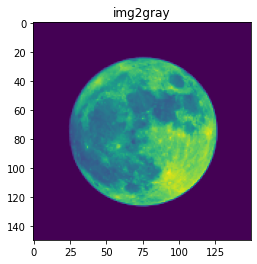

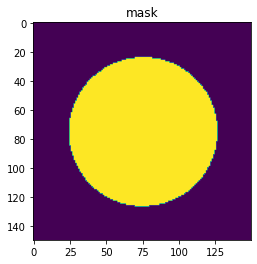

10.0


In [3]:
img_2_shape = img2.shape
roi = img1[0:img_2_shape[0],0:img_2_shape[1]]
print(roi.shape)
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img2gray)
plt.title('img2gray')
plt.show()
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
plt.imshow(mask)
plt.title('mask')
plt.show()
print(ret)

In [ ]:
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of moon in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
print(img1.shape, mask.shape)
# Take only region of moon from moon image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put moon in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
'''
el-satr elgay da saye3 awii
'''
img1[0:img_2_shape[0], 0:img_2_shape[1]] = dst
#Create resizable windows for our display images
cv.namedWindow('img2_bg', cv.WINDOW_NORMAL)
cv.namedWindow('img2_fg', cv.WINDOW_NORMAL)
cv.namedWindow('mask', cv.WINDOW_NORMAL)
cv.namedWindow('maskinv', cv.WINDOW_NORMAL)
cv.namedWindow('res', cv.WINDOW_NORMAL)
cv.imshow('mask',mask)
cv.imshow('maskinv',mask_inv)
cv.imshow('img1_bg',img1_bg)
cv.imshow('img2_fg',img2_fg)
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()